<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/AugustLeetCodePart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

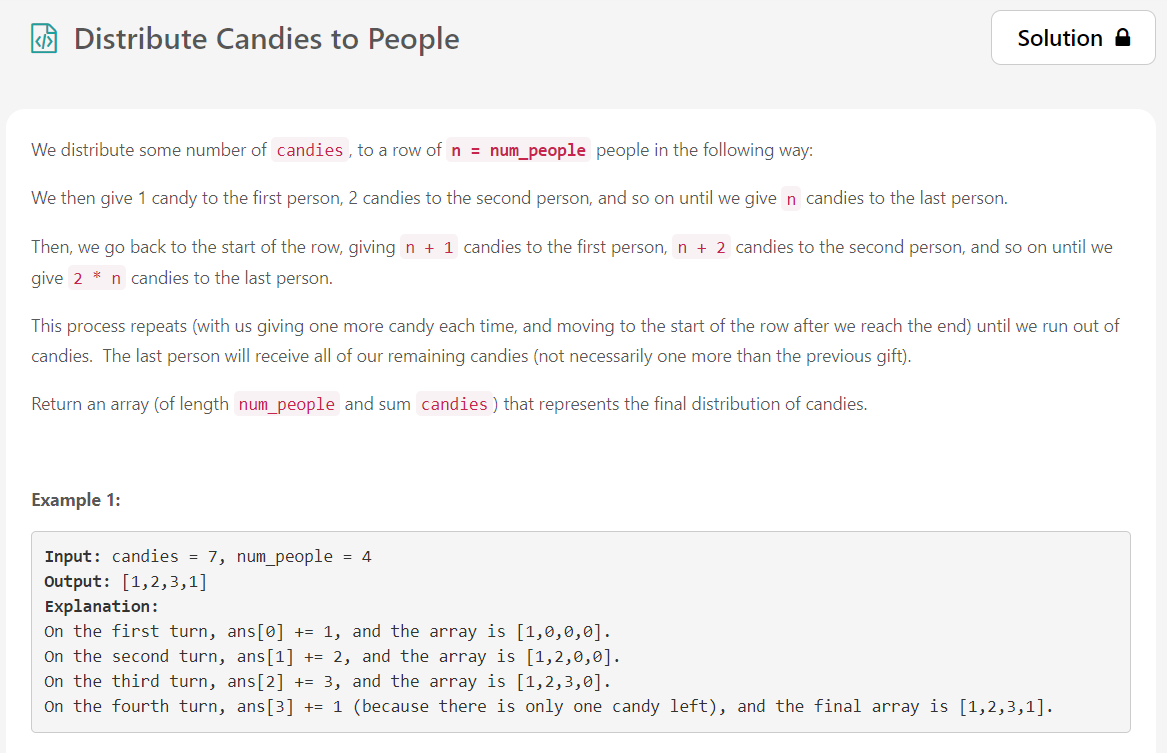

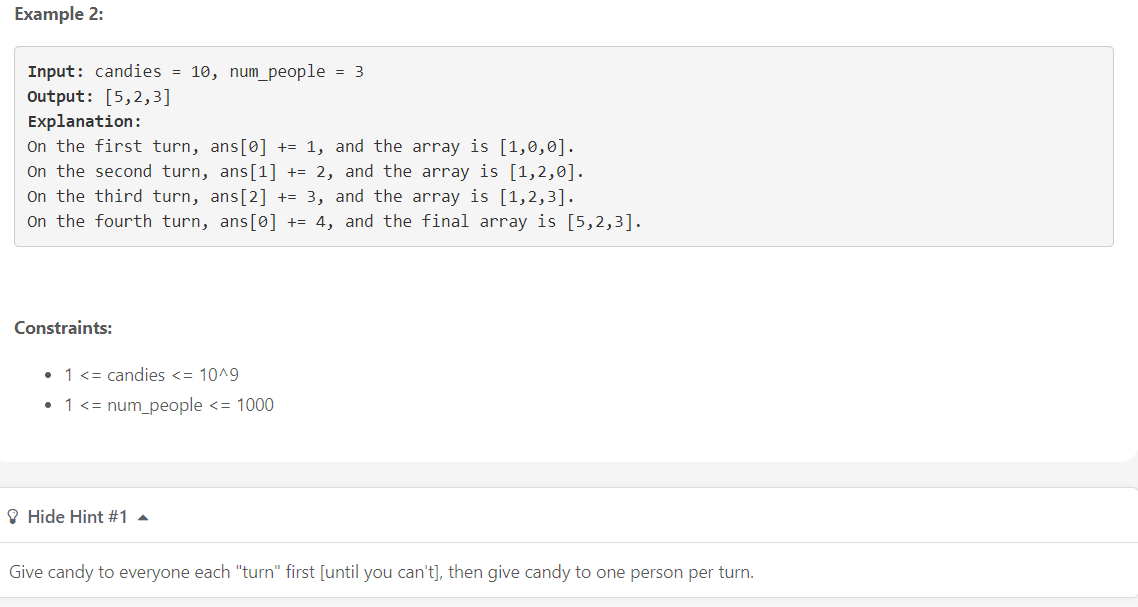

In [ ]:
# My solution :
class Solution:
    def distributeCandies(self, candies: int, num_people: int) -> List[int]:
        ret = [0 for x in range(num_people)]
        i, give = 0, 1
        while candies:           
            if candies >= give:
                ret[i] += give
                candies -= give
                give += 1
            else:
                ret[i] += candies
                candies, give = 0,0
            
            i += 1
            if i >= num_people:
                i = 0
            
        return ret




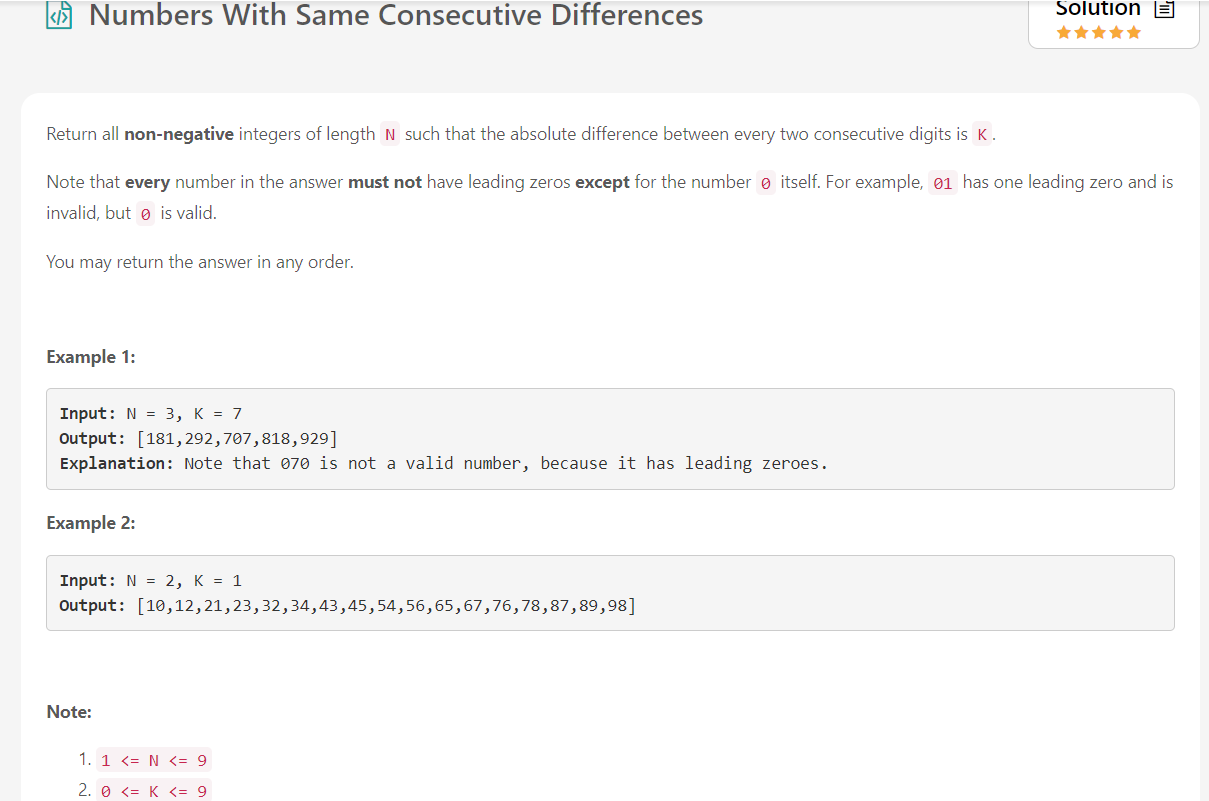

In [ ]:
# phone solution 

class Solution:
    def numsSameConsecDiff(self, N: int, K: int) -> List[int]:
        ret = [1,2,3,4,5,6,7,8,9]
        
        for _ in range(N-1):
            temp = []
            
            for num in ret:
                last_digit = num % 10
                if last_digit - K >= 0:
                    temp.append(num * 10 + last_digit - K)
                if K != 0 and last_digit + K <10:
                    temp.append( num * 10 + last_digit + K)
                
            ret = temp
            
        if N == 1:
            ret.append(0)
            
        return ret
                

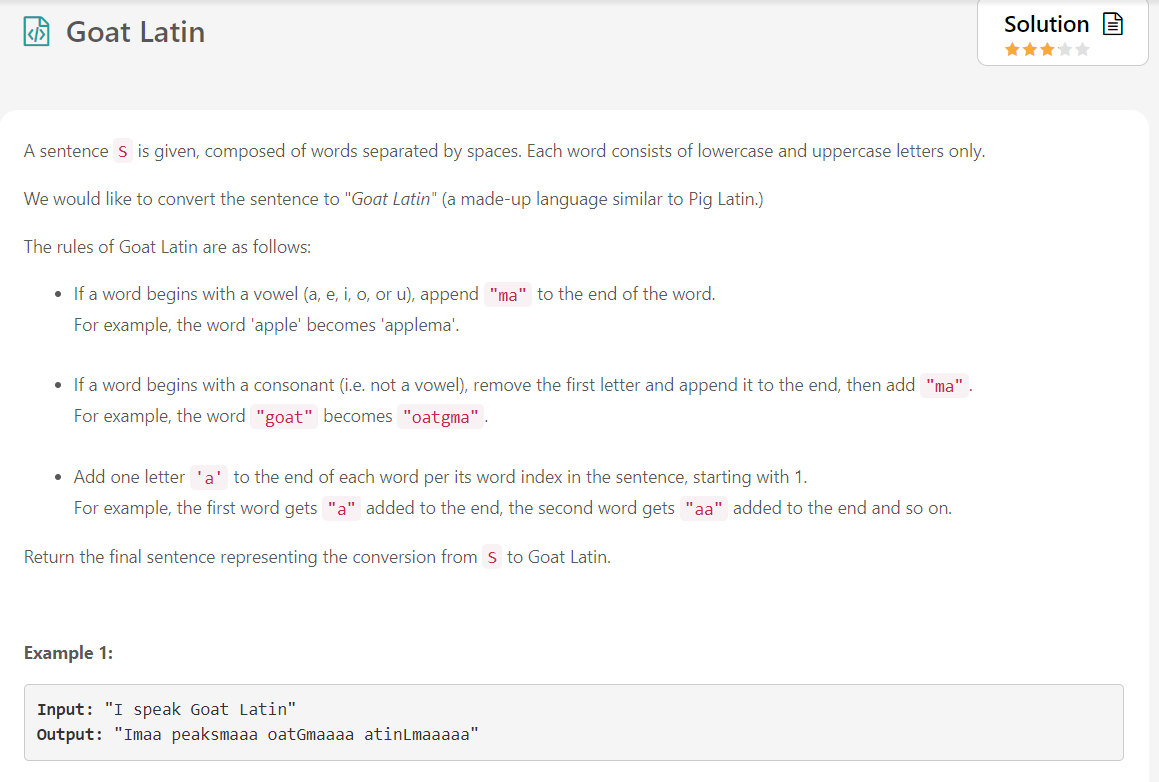

In [ ]:
'''August 19th Goat Latin 

Example 2:

Input: "The quick brown fox jumped over the lazy dog"
Output: "heTmaa uickqmaaa rownbmaaaa oxfmaaaaa umpedjmaaaaaa overmaaaaaaa hetmaaaaaaaa azylmaaaaaaaaa ogdmaaaaaaaaaa"
 

Notes:
S contains only uppercase, lowercase and spaces. Exactly one space between each word.
1 <= S.length <= 150.

'''
# my solution 

class Solution:
    def toGoatLatin(self, S: str) -> str:
        mylist = S.split()
        for i in range(len(mylist)): 
            if mylist[i][0] in ['a','e','i','o','u','A','E','I','O','U']:
                mylist[i] = mylist[i] + 'ma'
            else:
                mylist[i] = mylist[i][1:] + mylist[i][0] + 'ma'
                
            mylist[i] = mylist[i] + 'a' * (i+1)
        
        return ' '.join(word for word in mylist)




# fastest submssion 
class Solution:
    def toGoatLatin(self, S: str) -> str:
         
        W = S.split(" ")
        out = ''
        
        for i, s in enumerate(W):
            
            if s[0].lower()  in ['a', 'e', 'i', 'o', 'u']:
                s = s + "ma"
            else:
                s = s[1:] + s[0]
                s = s + "ma"
                
            while(i>=0):
                s = s + 'a'
                i = i-1
                
            out = out + s + " "
            
        print(W)   
        return out[0:len(out)-1]


""" second fastest """
class Solution:
    def toGoatLatin(self, S: str) -> str:
        S+=" "
        vowels=set(list("aeiouAEIOU"))
        words=[""]
        for char in S:
            if char == " ":
                if words[-1][0] not in vowels:
                    words[-1]= words[-1][1:]+ words[-1][0]
                words[-1]+= "ma"+ ("a" *len(words))
                words.append("")
            else:
                words[-1]+= char
        return " ".join(words)[:-1]
        

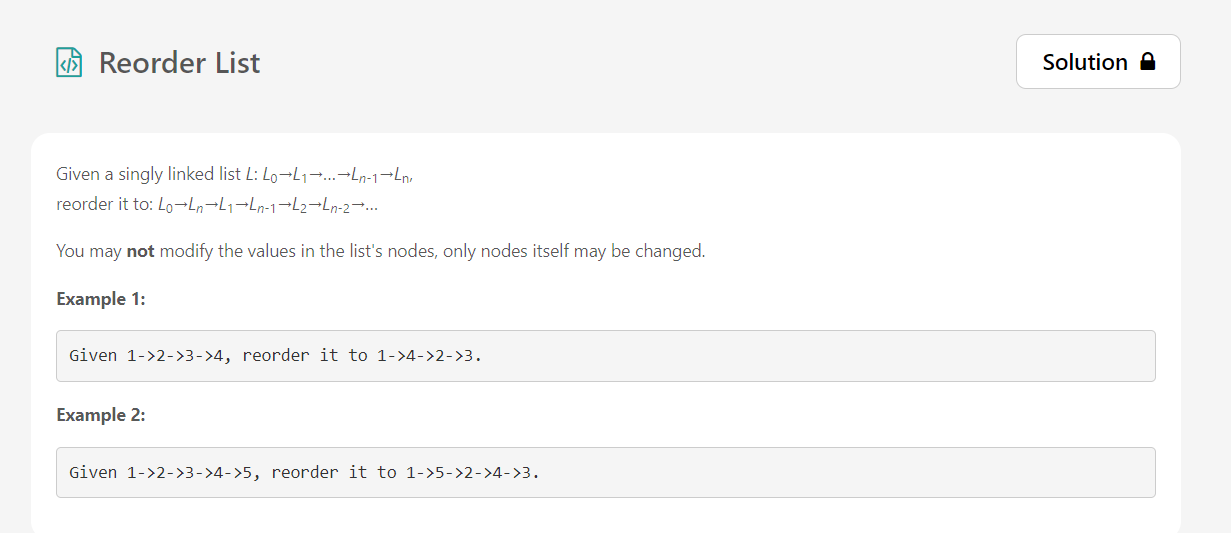

In [ ]:
'''August 20th Reorder List '''
# Find the mid point, reverse list after mid point, then interleave the 2 sides.
# Time - O(n)
# Space - O(1)

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next

# Solution 1: Note to understand solution using stack 
# Time O(n)
# Space O(n)
class Solution:
    def reorderList(self, head: ListNode) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        stack = [] 
        curr = ListNode()
        curr = head
        # save all the list to the stack 
        while curr:
            stack.append(curr)
            curr = curr.next 
        
        # print(stack)
        # print(stack.pop()) # last node
        cur = head 
        size = len(stack)
        
        if size <= 2: # dont need to change anything 
            return 
        
        nextt = ListNode() # an empty node 
        for i in range(size//2):
            nextt = cur.next #put 2 to nextt
            cur.next = stack.pop() # pop 4 to link to 1, curr.next = 4 
            cur = cur.next  # set cur to be 4 
            cur.next = nextt # set next of 4 to be 2. 
            cur = cur.next # set cur to be 2. 
            # after the 1st loop, we ll have 1->4->2->3
            
        # finally set last node.next to None
        cur.next = None

# Solution 2

class Solution:
    def reorderList(self, head: ListNode) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        # check empty
        ì not head or not head.next:
            return 
    
        # reversing, slow advance by 1, fast advance by 2 
        slow, fast = head, head
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
            
        # so now, slow is in the middle of the list, fast is at the end of the list 
        
        
        
    
    

# using 2 pointers. 
class Solution:
    def reorderList(self, head: ListNode) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        if not head:
            return None

        # set slow to mid for odd length lists, first of second half for even
        fast, slow = head, head
        while fast and fast.next:
            fast = fast.next.next
            slow = slow.next

        # reverse nodes after slow (slow has pointers from both sides)
        prev, node = None, slow
        while node:
            prev, node.next, node = node, prev, node.next

        first, second = head, prev # heads of the normal and reversed lists
        while second.next:
            first.next, first = second, first.next # insert second after first
            second.next, second = first, second.next # insert first after second


# fastest submission 

class Solution:
    def reverse_ll(self, head: ListNode) -> ListNode:
        prev = nex = None
        curr = head
        while curr:
            nex = curr.next # store the next term
            curr.next = prev # then switch next pointer to the previous term
            prev = curr # increment previous term to the current term
            curr = nex # increment current term to the stored old_next_term
        return prev # prev is at the new head
    def reorderList(self, head: ListNode) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        if not head:
            return
        
        prev = None
        slow = fast = l1 = head
        while fast and fast.next:
            prev = slow
            slow = slow.next
            fast = fast.next.next
        l2 = self.reverse_ll(slow)
        while l2.next:
            tmp = l1.next
            l1.next = l2
            l1 = tmp
            
            tmp = l2.next
            l2. next = l1
            l2 = tmp

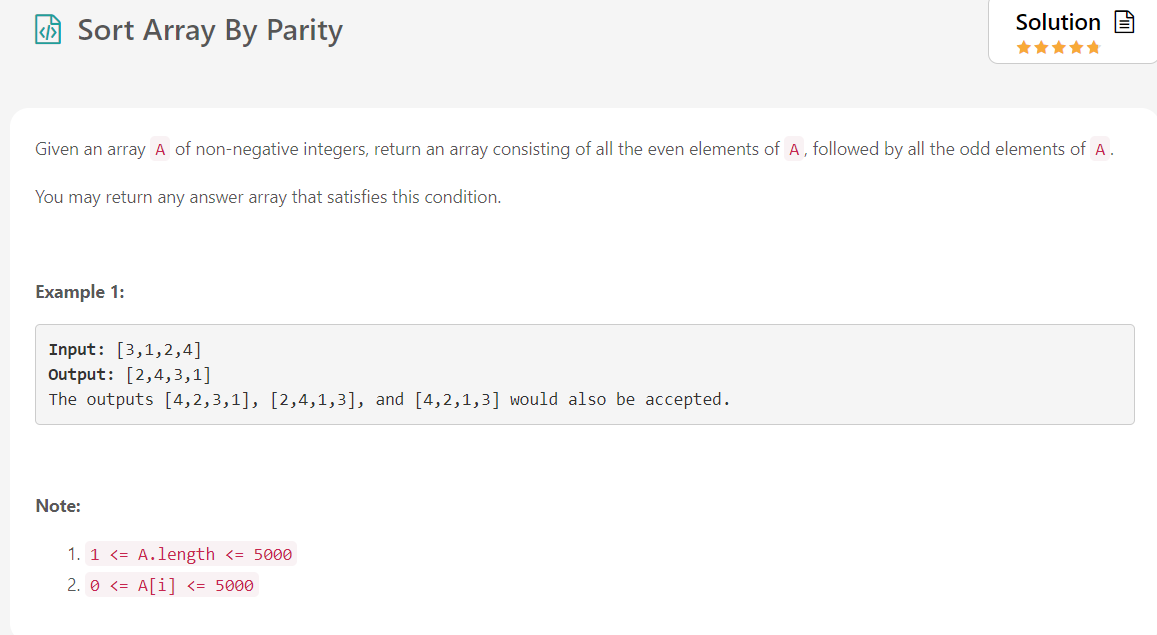

In [ ]:
''' August 21st Sort array by parity Leet code '''

# My submission 
class Solution:
    def sortArrayByParity(self, A: List[int]) -> List[int]:
        return [a for a in A if not a%2] +  [b for b in A if b%2]

# Other submissions
#1 using lambda

class Solution:
    def sortArrayByParity(self, A: List[int]) -> List[int]:
        A.sort(key = lambda x: x%2)
        return A

# 2 stacks
class Solution:
    def sortArrayByParity(self, A: List[int]) -> List[int]:
        even=[]
        odd=[]
        for i in range(len(A)):
            if A[i]%2==0:
                even.append(A[i])
            else:
                odd.append(A[i])
        result=even+odd
        return result

## very long time. 
class Solution:
    def sortArrayByParity(self, A: List[int]) -> List[int]:
        ret=[]

        for i in range(len(A)):
            if not A[i]%2:
                ret = [A[i]] + ret # this is very long, as well as insert method
            else:
                ret =  ret + [A[i]]

        return ret